In [2]:
from scipy.stats import t, poisson, binom, chi2_contingency
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [6]:
# T Student:
# A study interviewed 9 data scientists and found that the average salary is 75.00 R$/h and the standard deviation is 10.

In [7]:
# What is the probability that the salary is less than R$80.00?
t.cdf(((80-75)/(10/(9**(1/2)))), 9-1)

0.9139983540240443

In [8]:
# What is the probability that the salary is more than R$80.00?
t.sf(((80-75)/(10/(9**(1/2)))), 9-1)

0.08600164597595565

In [9]:
# Poisson:
# A study reveals that there are around two car accidents a day in the Scipy city

In [10]:
# What is the probability of 3 accidents occurring in one day?
poisson.pmf(3,2)

0.18044704431548356

In [12]:
# What is the probability of more than 3 accidents occurring in a day?
poisson.sf(3,2)

0.14287653950145296

In [15]:
# What is the probability of 3 or less accidents occurring in a day?
poisson.cdf(3,2)

0.857123460498547

In [16]:
# Binomial:
# A test is given with 10 questions, each with 5 alternatives, but only one is correct.

In [19]:
# What is the probability of getting 0 questions right in the test?
binom.pmf(0, 10, 0.2)

0.10737418240000003

In [21]:
# What is the probability of getting 7 or less questions right in the test?
binom.cdf(7, 10, 0.2)

0.9999220736

In [23]:
# What is the probability of getting 7 or more questions right in the test?
1 - binom.cdf(6, 10, 0.2)

0.0008643583999999871

In [31]:
# Chi square
movie = np.array([[19, 6],[43, 32]])
p = chi2_contingency(movie)[1]
if(p < 0.05):
    print("H0 rejected")
else:
    print("H0 accepted")

H0 accepted


In [4]:
# Anova
data = pd.read_csv("anova.csv", sep=";")
data.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


<Axes: title={'center': 'Horas'}, xlabel='[Remedio]'>

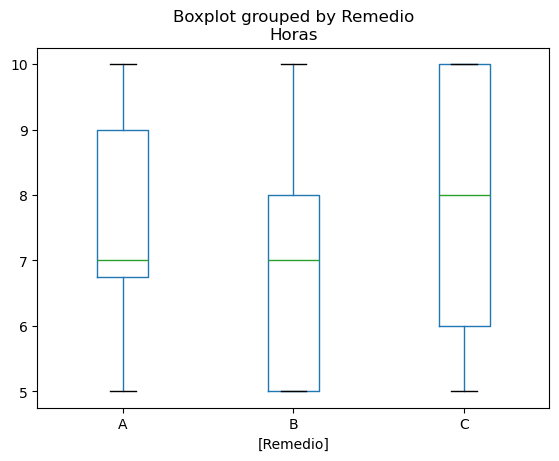

In [6]:
data.boxplot(by="Remedio", grid=False)

In [9]:
model1 = ols("Horas ~ Remedio", data = data).fit()
result1 = sm.stats.anova_lm(model1)
result1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [11]:
model2 = ols("Horas ~ Remedio * Sexo", data = data).fit()
result2 = sm.stats.anova_lm(model2)
result2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [13]:
# Test of Tukey
mc = MultiComparison(data["Horas"], data["Remedio"])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     A      B   -0.625 0.7991 -3.081 1.831  False
     A      C    0.375 0.9219 -2.081 2.831  False
     B      C      1.0 0.5689 -1.456 3.456  False
-------------------------------------------------
